<a href="https://colab.research.google.com/github/ibonetc/LLM_EPM/blob/main/LLM_Embeddings_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Embedding: Ejemplo de clasificación

In [ ]:
!pip install transformers[torch]

Note: you may need to restart the kernel using %restart_python or dbutils.library.restartPython() to use updated packages.


In [ ]:
!pip install transformers accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 67.7 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.41.1
    Uninstalling transformers-4.41.1:
      Successfully uninstalled transformers-4.41.1


In [ ]:
!pip install gensim

  Obtaining dependency information for gensim from https://files.pythonhosted.org/packages/78/4f/f6045d5d5f8e7838c42572607ce440f95dbf4de5da41ae664198c2839c05/gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 0.0/26.7 MB ? eta -:--:--
   ━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/26.7 MB 63.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/26.7 MB 120.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━ 14.3/26.7 MB 177.5 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸━━━━━━━━━ 20.4/26.7 MB 177.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.6/26.7 MB 181.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.7/26.7 MB 177.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.7/26.7 MB 177.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.7/26.7 MB 177.8 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 26.7/26.7 

In [ ]:
dbutils.library.restartPython()

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
nltk.download('stopwords')
nltk.download('punkt')
import re
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
url='https://drive.google.com/file/d/125x5b53lSHl5NBbKOcOPz9uxFQolXCEy/view?usp=sharing'
url='https://drive.google.com/uc?id='+ url.split('/')[-2]
df=pd.read_csv(url)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


## Procesar Texto: Limpiar, tokenizar y quitar stopwords

In [ ]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [ ]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
df['review_clean'] = df['review'].apply(lambda x: re.sub(r'<.*?>', ' ', x))
df['review_clean'] = df['review_clean'].apply(lambda x: re.sub(r'\s+', ' ', x))

In [ ]:
df

,review,sentiment,review_clean
0,One of the other reviewers has mentioned that ...,positive,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...,positive,A wonderful little production. The filming tec...
2,I thought this was a wonderful way to spend ti...,positive,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...,negative,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"Petter Mattei's ""Love in the Time of Money"" is..."
...,...,...,...
49995,I thought this movie did a down right good job...,positive,I thought this movie did a down right good job...
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"Bad plot, bad dialogue, bad acting, idiotic di..."
49997,I am a Catholic taught in parochial elementary...,negative,I am a Catholic taught in parochial elementary...
49998,I'm going to have to disagree with the previou...,negative,I'm going to have to disagree with the previou...


In [ ]:
print(df['review'][69])
print(df['review_clean'][69])

This film laboured along with some of the most predictable story lines and shallow characters ever seen. The writer obviously bought the playbook "How to write a space disaster movie" and followed it play by play. In particular, the stereo-typical use of astronauts talking to their loved ones from outer space - putting on a brave show in the face of disaster - has been done time and time again.<br /><br />Max Q appears to have been written in the hope that the producers would throw $50 million at the project. But, judging by the latter half of the film which contained numerous lame attempts at special effects, the producers could only muster $50 thousand. To learn that the film was nominated for a "Special Visual Effects" Emmy has me absolutely gob-smacked.<br /><br />I think a handful of high school students with a pass in Media Studies could have created more believable effects!<br /><br />And the plot holes are too numerous to mention. But I will pick one out as an example. Now, I'm

In [ ]:
df['review_clean'] = df['review_clean'].str.lower()

# Aplicar map con una función lambda
df['preprocess_review'] = df['review_clean'].map(lambda x: [token for token in word_tokenize(x) if token not in stop_words])

In [ ]:
df

,review,sentiment,review_clean,preprocess_review
0,One of the other reviewers has mentioned that ...,positive,one of the other reviewers has mentioned that ...,"[one, reviewers, mentioned, watching, 1, oz, e..."
1,A wonderful little production. <br /><br />The...,positive,a wonderful little production. the filming tec...,"[wonderful, little, production, ., filming, te..."
2,I thought this was a wonderful way to spend ti...,positive,i thought this was a wonderful way to spend ti...,"[thought, wonderful, way, spend, time, hot, su..."
3,Basically there's a family where a little boy ...,negative,basically there's a family where a little boy ...,"[basically, 's, family, little, boy, (, jake, ..."
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,"petter mattei's ""love in the time of money"" is...","[petter, mattei, 's, ``, love, time, money, ''..."
...,...,...,...,...
49995,I thought this movie did a down right good job...,positive,i thought this movie did a down right good job...,"[thought, movie, right, good, job, ., n't, cre..."
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative,"bad plot, bad dialogue, bad acting, idiotic di...","[bad, plot, ,, bad, dialogue, ,, bad, acting, ..."
49997,I am a Catholic taught in parochial elementary...,negative,i am a catholic taught in parochial elementary...,"[catholic, taught, parochial, elementary, scho..."
49998,I'm going to have to disagree with the previou...,negative,i'm going to have to disagree with the previou...,"['m, going, disagree, previous, comment, side,..."


In [ ]:
X_text=[txt for txt in df.preprocess_review]
labels=[txt for txt in df.sentiment]

In [ ]:
texts=[' '.join(text) for text in X_text]
texts[0]

"one reviewers mentioned watching 1 oz episode 'll hooked . right , exactly happened . first thing struck oz brutality unflinching scenes violence , set right word go . trust , show faint hearted timid . show pulls punches regards drugs , sex violence . hardcore , classic use word . called oz nickname given oswald maximum security state penitentary . focuses mainly emerald city , experimental section prison cells glass fronts face inwards , privacy high agenda . em city home many .. aryans , muslims , gangstas , latinos , christians , italians , irish .... scuffles , death stares , dodgy dealings shady agreements never far away . would say main appeal show due fact goes shows would n't dare . forget pretty pictures painted mainstream audiences , forget charm , forget romance ... oz n't mess around . first episode ever saw struck nasty surreal , could n't say ready , watched , developed taste oz , got accustomed high levels graphic violence . violence , injustice ( crooked guards 'll so

In [ ]:
print(len(texts))
print(len(labels))

50000
50000


In [ ]:
import string
from string import punctuation

In [ ]:
punt=list(punctuation)
texts_punt=[''.join(e for e in t if e not in punt)  for t in texts]
texts_punt[0]

'one reviewers mentioned watching 1 oz episode ll hooked  right  exactly happened  first thing struck oz brutality unflinching scenes violence  set right word go  trust  show faint hearted timid  show pulls punches regards drugs  sex violence  hardcore  classic use word  called oz nickname given oswald maximum security state penitentary  focuses mainly emerald city  experimental section prison cells glass fronts face inwards  privacy high agenda  em city home many  aryans  muslims  gangstas  latinos  christians  italians  irish  scuffles  death stares  dodgy dealings shady agreements never far away  would say main appeal show due fact goes shows would nt dare  forget pretty pictures painted mainstream audiences  forget charm  forget romance  oz nt mess around  first episode ever saw struck nasty surreal  could nt say ready  watched  developed taste oz  got accustomed high levels graphic violence  violence  injustice  crooked guards ll sold nickel  inmates ll kill order get away  well m

## Embedding de texto

### Bag of words

In [ ]:
vectorizer = CountVectorizer()
X_bow = vectorizer.fit_transform(texts_punt)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bow, labels, test_size=0.2, random_state=42)

In [ ]:
x=X_train[69].toarray()
len(x[0])

137491

In [ ]:
classifier=LogisticRegression(max_iter=1000)
classifier.fit(X_train,y_train)

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=classifier.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    negative       0.89      0.88      0.89      4961
    positive       0.89      0.89      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



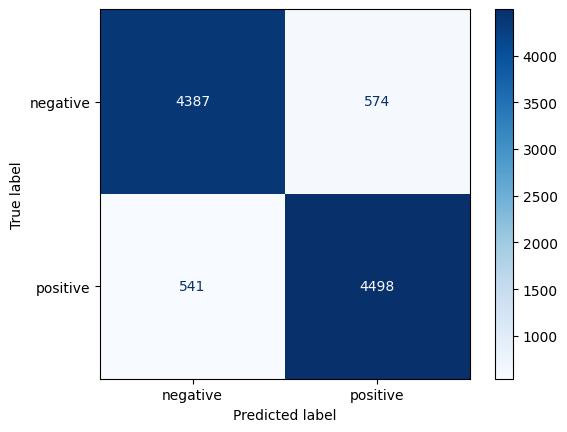

In [ ]:
classes=np.unique(labels)
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

### TF-IDF

In [ ]:
vectorizer=TfidfVectorizer()
X_tfidf=vectorizer.fit_transform(texts_punt)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, labels, test_size=0.2, random_state=42)

In [ ]:
clf=LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.91      0.89      0.90      4961
    positive       0.89      0.91      0.90      5039

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

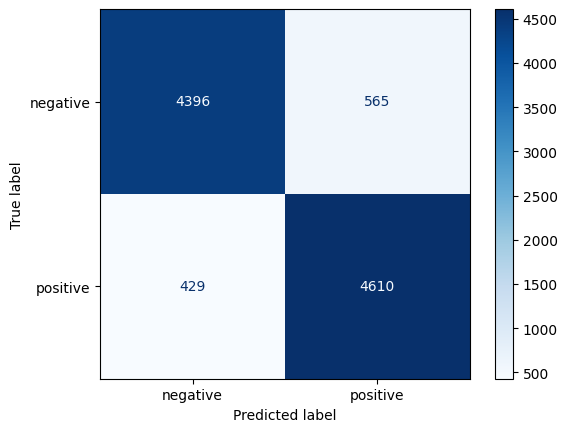

In [ ]:
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Word2Vec


In [ ]:
print(X_text[0])

['one', 'reviewers', 'mentioned', 'watching', '1', 'oz', 'episode', "'ll", 'hooked', '.', 'right', ',', 'exactly', 'happened', '.', 'first', 'thing', 'struck', 'oz', 'brutality', 'unflinching', 'scenes', 'violence', ',', 'set', 'right', 'word', 'go', '.', 'trust', ',', 'show', 'faint', 'hearted', 'timid', '.', 'show', 'pulls', 'punches', 'regards', 'drugs', ',', 'sex', 'violence', '.', 'hardcore', ',', 'classic', 'use', 'word', '.', 'called', 'oz', 'nickname', 'given', 'oswald', 'maximum', 'security', 'state', 'penitentary', '.', 'focuses', 'mainly', 'emerald', 'city', ',', 'experimental', 'section', 'prison', 'cells', 'glass', 'fronts', 'face', 'inwards', ',', 'privacy', 'high', 'agenda', '.', 'em', 'city', 'home', 'many', '..', 'aryans', ',', 'muslims', ',', 'gangstas', ',', 'latinos', ',', 'christians', ',', 'italians', ',', 'irish', '....', 'scuffles', ',', 'death', 'stares', ',', 'dodgy', 'dealings', 'shady', 'agreements', 'never', 'far', 'away', '.', 'would', 'say', 'main', 'appe

In [ ]:
word2vec_model = Word2Vec(X_text, vector_size=100, window=5, min_count=1, workers=4)

In [ ]:
word2vec_model.wv.index_to_key

[',',
 '.',
 "'s",
 'movie',
 'film',
 ')',
 '(',
 "n't",
 '``',
 "''",
 'one',
 '!',
 'like',
 '?',
 'good',
 'would',
 'even',
 'time',
 'really',
 'see',
 'story',
 "'",
 '...',
 'well',
 ':',
 '-',
 'much',
 'could',
 'get',
 'people',
 'bad',
 'great',
 'also',
 'first',
 'made',
 'way',
 'make',
 'movies',
 'characters',
 'think',
 '*',
 'watch',
 'character',
 'films',
 'many',
 ';',
 'seen',
 'two',
 'never',
 'love',
 'acting',
 'plot',
 'show',
 'best',
 'know',
 'little',
 'life',
 'ever',
 'better',
 'man',
 'end',
 'scene',
 'still',
 'say',
 'scenes',
 '--',
 "'ve",
 'something',
 'go',
 "'m",
 'back',
 'thing',
 'watching',
 'real',
 'actors',
 'though',
 'years',
 'funny',
 'another',
 'actually',
 'nothing',
 'makes',
 'work',
 'find',
 'look',
 'director',
 'lot',
 'going',
 'new',
 'every',
 'old',
 'part',
 '&',
 "'re",
 'us',
 'cast',
 'things',
 'world',
 'want',
 'quite',
 'got',
 'pretty',
 'around',
 'seems',
 'ca',
 'young',
 'take',
 'however',
 'enough',
 'f

In [ ]:
# Promedio de los vectores de las palabras en el texto
def get_text_embedding(tokens):
    vectors = [word2vec_model.wv[word] for word in tokens if word in word2vec_model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(word2vec_model.vector_size)

In [ ]:
X_word2vec = np.array([get_text_embedding(text) for text in X_text])

In [ ]:
#Filtrar embedding nulos
X_word2vec = [e for e in X_word2vec if e is not None]
labels = [l for i,l in enumerate(labels) if X_word2vec[i] is not None]

In [ ]:
print(len(X_word2vec))
print(len(labels))

50000
50000


Entrenar el modelo

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_word2vec, labels, test_size=0.2, random_state=42)

In [ ]:
clf=LogisticRegression(max_iter=1000)
clf.fit(X_train,y_train)

Uploading artifacts:   0%|          | 0/3 [00:00<?, ?it/s]

Uploading artifacts:   0%|          | 0/9 [00:00<?, ?it/s]

LogisticRegression(max_iter=1000)

In [ ]:
y_pred=clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.87      0.85      0.86      4961
    positive       0.86      0.87      0.86      5039

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



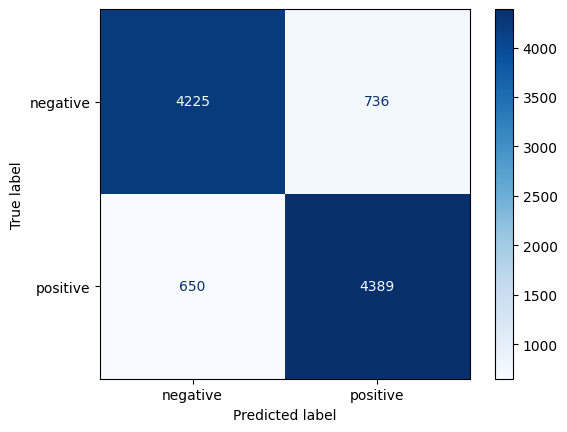

In [ ]:
cm=confusion_matrix(y_test,y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.show()

### Usar BERT
BERT (Bidirectional Encoder Representations from Transformers)

In [ ]:
from transformers import BertTokenizer, BertModel
import torch

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

**truncation=True**: Este parámetro controla si se realiza o no la truncación de las secuencias de entrada que exceden la longitud máxima permitida por el modelo. Si se establece en True, las secuencias se truncarán para ajustarse a la longitud máxima permitida. Si se establece en False, las secuencias que excedan la longitud máxima serán omitidas. La truncación es útil cuando se tiene un corpus con textos de diferentes longitudes y se desea ajustarlos a un tamaño fijo para el procesamiento por lotes.

**padding=True**: Este parámetro controla si se realiza o no el relleno de las secuencias de entrada para que todas tengan la misma longitud. Si se establece en True, se agregan tokens de relleno (generalmente [PAD] tokens) a las secuencias más cortas para igualar su longitud con la más larga. Esto es necesario para procesar por lotes de manera eficiente en la mayoría de los modelos de procesamiento de lenguaje natural.

**return_tensors='pt'**: Este parámetro controla el formato de salida de los datos tokenizados. Si se establece en 'pt', la función tokenizer devolverá tensores de PyTorch (torch.Tensor) para las secuencias tokenizadas, lo que facilita su uso en modelos de PyTorch. Otro valor común para este parámetro es 'tf', que devolvería tensores de TensorFlow si estás utilizando TensorFlow como backend.

In [ ]:
def get_bert_embeddings(text):
  inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True)
  outputs = model(**inputs)
  embeddings = outputs.last_hidden_state.mean(dim=1)  # Obtén el promedio de los embeddings de todas las palabras
  return embeddings.detach().numpy()

In [ ]:
X_bert = np.array([get_bert_embeddings(text) for text in X_text])

NameError: name 'get_embedding' is not defined

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_bert, labels, test_size=0.2, random_state=42)

In [ ]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.84      0.83      0.84      4961
    positive       0.84      0.85      0.84      5039

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



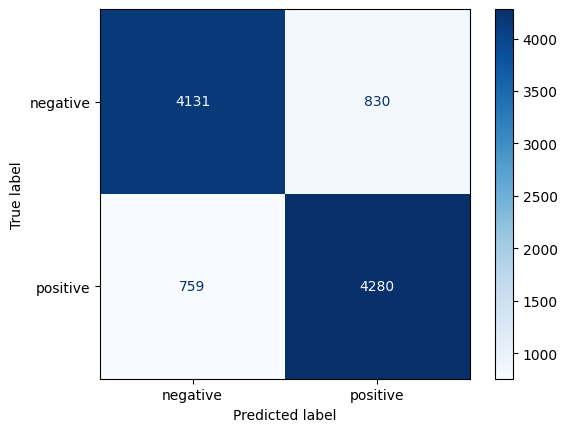

In [ ]:
cm=confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

### Usar OpenAI

####Embedding usando la api de OpenAI (Es paga)

In [ ]:
!pip install tiktoken

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 19.9 MB/s eta 0:00:00


In [ ]:
!pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 9.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 9.8 MB/s eta 0:00:00


OpenAI tiene varios modelos:


*   text-embedding-3-small
*   text-embedding-3-large
*   text-embedding-ada-002



In [ ]:
import openai
from openai import embeddings # Importa la función para obtener embeddings desde OpenAI
from openai import OpenAI
import os
from google.colab import userdata

In [ ]:
client = OpenAI(api_key=userdata.get('OPENAI_API_KEY'))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(text_embeddings, labels, test_size=0.2, random_state=42)

In [ ]:
def get_embedding(text, model="text-embedding-3-small"):
  text = text.replace("\n", " ")
  return client.embeddings.create(input = [text], model=model).data[0].embedding

In [ ]:
df['openai_embedding'] = df.combined.apply(lambda x: get_embedding(x, model='text-embedding-3-small'))

In [ ]:
df.to_csv('output/embedded_1k_reviews.csv', index=False)

In [ ]:
text_embeddings = np.array(df['openai_embedding'].tolist())

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [ ]:
# Evaluar el modelo
y_pred = classifier.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

## Usar BertForSequenceClassification con fine-tuning

In [ ]:
token_file_path = '/Volumes/universidad_eia/default/isis/token_HF.txt'

with open(token_file_path, 'r') as file:
    token = file.read().strip()

In [ ]:
import os
os.environ["HUGGINGFACE_HUB_TOKEN"] = token

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

#### Tokenizar los textos y convertirlos a tensores de PyTorch

In [ ]:
train_encodings = tokenizer(X_train, truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer(X_test, truncation=True, padding=True, return_tensors='pt')

#### Codificar las etiquetas

In [ ]:
label_mapping = {"negative": 0, "positive": 1}
y_train_encoded = [label_mapping[label] for label in y_train]
y_test_encoded = [label_mapping[label] for label in y_test]

train_labels = torch.tensor(y_train_encoded)
test_labels = torch.tensor(y_test_encoded)

In [ ]:
num_labels=len(classes)

####Cargar los datos

In [ ]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    item['labels'] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

train_dataset = Dataset(train_encodings, train_labels)
test_dataset = Dataset(test_encodings, test_labels)

####Entrenar el modelo

In [ ]:
from transformers import BertForSequenceClassification, Trainer, TrainingArguments

model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=num_labels)

training_args = TrainingArguments(
    output_dir='/content/results',
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    logging_dir='/content/logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

trainer.train()
trainer.save_model('/content/drive/MyDrive/Data_AI/bertmodelclasification')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-26-3a36be59f38e>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-26-3a36be59f38e>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Step,Training Loss
500,0.463800
1000,0.408700
1500,0.357800
2000,0.365600
2500,0.336700
3000,0.340400
3500,0.352000
4000,0.342800
4500,0.342900
5000,0.307000


<ipython-input-26-3a36be59f38e>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-26-3a36be59f38e>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
<ipython-input-26-3a36be59f38e>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-26-3a36be59f38e>:8: UserWarning: To copy construct from a tensor, it is recommended to

TrainOutput(global_step=15000, training_loss=0.2391777796427409, metrics={'train_runtime': 2577.1966, 'train_samples_per_second': 46.562, 'train_steps_per_second': 5.82, 'total_flos': 3.15733266432e+16, 'train_loss': 0.2391777796427409, 'epoch': 3.0})

####Evaluar el modelo

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

preds = trainer.predict(test_dataset)
pred_labels = preds.predictions.argmax(-1)
report = classification_report(test_labels, pred_labels)
print(report)

<ipython-input-26-3a36be59f38e>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-26-3a36be59f38e>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


              precision    recall  f1-score   support

           0       0.92      0.93      0.92      4961
           1       0.93      0.92      0.92      5039

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



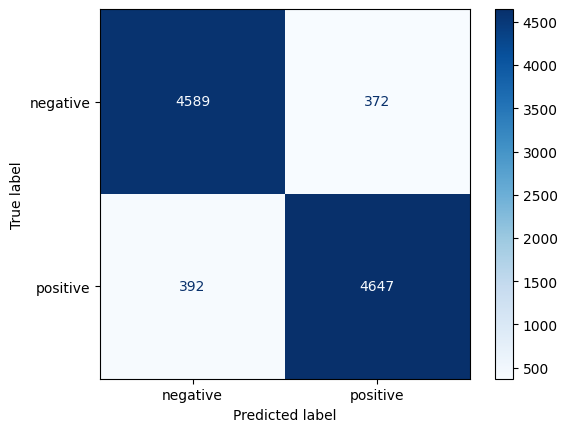

In [ ]:
cm = confusion_matrix(test_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)

## Usar DistilBert

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification, TrainingArguments, Trainer

In [ ]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased-finetuned-sst-2-english")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [ ]:
X=df.review_clean.to_numpy()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

In [ ]:
#X_train = X_train.tolist()
#X_test = X_test.tolist()

In [ ]:
train_encodings = tokenizer(X_train, truncation=True, padding=True, return_tensors='pt')
test_encodings = tokenizer(X_test, truncation=True, padding=True, return_tensors='pt')

In [ ]:
label_mapping={'negative':0,'positive':1}
y_train_encoded = [label_mapping[label] for label in y_train]
y_test_encoded = [label_mapping[label] for label in y_test]

train_labels=torch.tensor(y_train_encoded)
test_labels=torch.tensor(y_test_encoded)

### Cargar los datos

In [ ]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self, encodings, labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self, idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    item['labels'] = torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

In [ ]:
train_dataset = Dataset(train_encodings, train_labels)
test_dataset = Dataset(test_encodings, test_labels)

###Entrenar el modelo

In [ ]:
torch.cuda.empty_cache()

In [ ]:
training_args = TrainingArguments(
    output_dir='/content/results',
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    logging_dir='/content/logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

In [ ]:
trainer.train()
trainer.save_model('/content/drive/MyDrive/Data_AI/distilBertmodelclasification')

<ipython-input-15-495ea0427d3c>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-15-495ea0427d3c>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


Step,Training Loss
500,0.274500
1000,0.228700
1500,0.163800
2000,0.118700
2500,0.114400
3000,0.051200
3500,0.045400


<ipython-input-15-495ea0427d3c>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-15-495ea0427d3c>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])
<ipython-input-15-495ea0427d3c>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-15-495ea0427d3c>:8: UserWarning: To copy construct from a tensor, it is recommended to

####Evaluar el modelo

In [ ]:
model = DistilBertForSequenceClassification.from_pretrained('/content/drive/MyDrive/Data_AI/distilBertmodelclasification', num_labels=2)

training_args = TrainingArguments(
    output_dir='/content/results',
    num_train_epochs=3,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    logging_dir='/content/logs',
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
)

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

preds = trainer.predict(test_dataset)
pred_labels = preds.predictions.argmax(-1)
report = classification_report(test_labels, pred_labels)
print(report)

<ipython-input-18-495ea0427d3c>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-18-495ea0427d3c>:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item['labels'] = torch.tensor(self.labels[idx])


              precision    recall  f1-score   support

           0       0.92      0.93      0.93      4961
           1       0.93      0.92      0.93      5039

    accuracy                           0.93     10000
   macro avg       0.93      0.93      0.93     10000
weighted avg       0.93      0.93      0.93     10000



In [ ]:
classes=np.unique(labels)

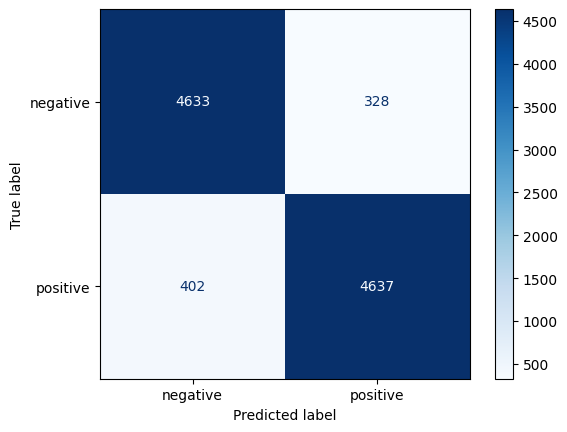

In [ ]:
cm = confusion_matrix(test_labels, pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)